# Tutorial of network schematas - Bio Models
The network schematas for biological relevant boolean network models

In [2]:
%matplotlib inline

In [3]:
import math
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2g}'.format
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import graphviz
from IPython.display import HTML
#
import cana
from cana.datasets.bio import THALIANA, DROSOPHILA, BUDDING_YEAST
from cana.drawing.canalizing_map import draw_canalizing_map_graphviz

In [4]:
N = THALIANA()
#N = DROSOPHILA()
#N = BUDDING_YEAST()
print(N)

<BNetwork(name='Arabidopsis Thaliana', N=15, Nodes=['AP3', 'UFO', 'FUL', 'FT', 'AP1', 'EMF1', 'LFY', 'AP2', 'WUS', 'AG', 'LUG', 'CLF', 'TFL1', 'PI', 'SEP'])>


## Effective Graph

In [5]:
Nsg = N.structural_graph()

In [6]:
# Node Position for each one of the models
nodes = {d['label']:i for i,d in Nsg.nodes(data=True)}
print(nodes)
att = {}
#
if N.name == 'Arabidopsis Thaliana':
    foldername = 'thaliana'
    
    # Calculates Node position in a circle. Used to plot nodes always in the same position.
    for deg,name in zip(range(0,360,30), ['AG', 'AP3', 'PI', 'AP2', 'TFL1', 'FUL', 'AP1', 'FT', 'EMF1', 'LFY', 'SEP', 'WUS']):
        r = 150
        x, y = r*math.cos(math.radians(deg)), r*math.sin(math.radians(deg))
        att[name] = {'x':x,'y':y}
    # Nodes not on the circle. Manually position them = UFO, LUG, CLF
    for name,(x,y) in zip(['UFO','LUG','CLF'], [(200.,140.),(240.,50.),(240.,-50.)]):
        att[name] = {'x':x,'y':y}

elif N.name == 'Drosophila Melanogaster':
    foldername = 'drosophila'
    
    x,y = np.linspace(0,500,8,dtype=int), np.linspace(500,0,8,dtype=int)
    att['nWG']    = {'x':x[5],'y':y[0],'fillcolor':'#4f6fb0'}
    att['SLP']    = {'x':x[7],'y':y[1],'fillcolor':'#4f6fb0'}
    att['en']     = {'x':x[5],'y':y[1]}
    att['EN']     = {'x':x[5],'y':y[2]}
    att['nhhnHH'] = {'x':x[1],'y':y[4]}
    att['ci']     = {'x':x[4],'y':y[3]}
    att['PTC']    = {'x':x[2],'y':y[4]}
    att['nhhnHH'] = {'x':x[2],'y':y[2],'fillcolor':'#4f6fb0'}
    att['CI']     = {'x':x[4],'y':y[4]}
    att['PH']     = {'x':x[0],'y':y[5]}
    att['SMO']    = {'x':x[1],'y':y[5]}
    att['CIA']    = {'x':x[3],'y':y[5]}
    att['CIR']    = {'x':x[4],'y':y[5]}
    att['ptc']    = {'x':x[3],'y':y[6]}
    att['wg']     = {'x':x[4],'y':y[6]}
    att['hh']     = {'x':x[6],'y':y[6]}
    att['WG']     = {'x':x[4],'y':y[7]}
    att['HH']     = {'x':x[6],'y':y[7]}

elif N.name == 'Budding Yeast Cell Cycle':
    foldername = 'yeast'
    
    # Calculates Node position in a circle.
    for deg,name in zip( np.linspace(0,360,10), ['Cln3','MBF','Clb5,6','Mcm1/SFF','Swi5','Cdc20/14','Cdh1','Cln1,2','SBF']):
        r = 190
        deg += 90
        x, y = r*math.cos(math.radians(deg)), r*math.sin(math.radians(deg))
        att[name] = {'x':x,'y':y}
    # Nodes not on the circle. Manually position them = UFO, LUG, CLF
    for name,(x,y) in zip(['CellSize','Sic1','Clb1,2'], [(0.,280.),(0.,100.),(0.,-50.)]):
        att[name] = {'x':x,'y':y}

{'AP3': 0, 'UFO': 1, 'FUL': 2, 'FT': 3, 'AP1': 4, 'EMF1': 5, 'LFY': 6, 'AP2': 7, 'WUS': 8, 'AG': 9, 'LUG': 10, 'CLF': 11, 'TFL1': 12, 'PI': 13, 'SEP': 14}


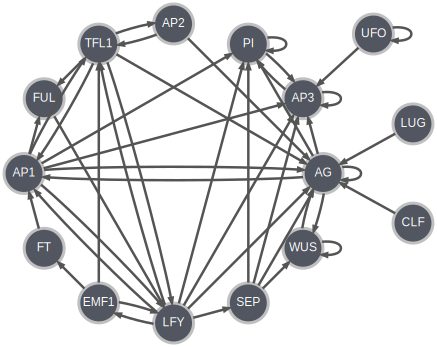

In [7]:
# Draw the Interaction Graph
G = graphviz.Digraph(name='Interaction Graph', engine='neato')
G.attr('graph', concentrate='false', simplify='false', overlap='false',splines='false')
G.attr('node', pin='true', shape='circle', fixedsize='true', width='.55', color='gray', style='filled', fillcolor='#515660', penwidth='3', fontname='Helvetica', fontcolor='white',fontsize='12')
G.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for node,d in Nsg.nodes(data=True):
    if d['label'] in att:
        natt = att[d['label']]
        if 'x' in natt or 'y' in natt:
            x,y = natt['x'] , natt['y']
            xy = '%.2f,%.2f!' % (x/72,y/72)
        if 'fillcolor' in natt:
            fillcolor = natt['fillcolor']
        else:
            fillcolor = '#515660'
    else:
        xy = ''
        fillcolor = '#515660'
    G.node(name=str(node), label=d['label'], pos=xy, fillcolor=fillcolor)

max_penwidth = 2.5
for s,t,d in Nsg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    G.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled, )

# Display
display(G)

In [10]:
# Calculate Effective Graph
threshold = 0.00
Neg = N.effective_graph(bound='upper', threshold=threshold)

Nodes: 15 | Edges: 41


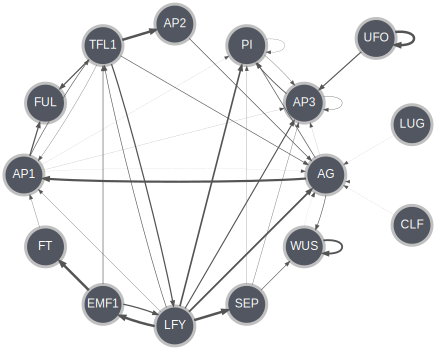

In [9]:
# Draw the Effective Graph
E = graphviz.Digraph(name='Effective Graph', engine='neato')
E.attr('graph', concentrate='false', simplify='false')
E.attr('node', shape='circle', fixedsize='true', width='.55', color='grey', style='filled', fillcolor='#515660', penwidth='3', fontname='Helvetica', fontcolor='white',fontsize='12')
E.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for node,d in Neg.nodes(data=True):
    if d['label'] in att:
        natt = att[d['label']]
        x,y = natt['x'],natt['y']
        xy = '%.1f,%.1f!' % (x/72,y/72)
        if 'fillcolor' in natt:
            fillcolor = natt['fillcolor']
        else:
            fillcolor = '#515660'
    else:
        xy = 'false'
    E.node(name=str(node), label=d['label'], pos=xy, fillcolor=fillcolor)

max_penwidth = 2.5
for s,t,d in Neg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    E.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled)
    
print('Nodes: %d | Edges: %d' % (len(Neg.nodes()) , len(Neg.edges()) ))
## Display
display(E)

In [9]:
bound = 'upper'
df = pd.DataFrame({
        'node':[n.name for n in N.nodes],
        'k':[n.k for n in N.nodes],
        'k_r':[n.input_redundancy(bound=bound, norm=False) for n in N.nodes],
        'k_e':[n.effective_connectivity(bound=bound,norm=False) for n in N.nodes],
        'k_s':[n.input_symmetry(bound=bound, norm=False) for n in N.nodes],
        'k_r*':[n.input_redundancy(bound=bound, norm=True) for n in N.nodes],
        'k_e*':[n.effective_connectivity(bound=bound,norm=True) for n in N.nodes],
        'k_s*':[n.input_symmetry(bound=bound, norm=True) for n in N.nodes],
        'k^{out}':[v for n,v in Neg.out_degree()],
        'k_e^{out}':[v for n,v in Neg.out_degree(weight='weight')],
    }).set_index('node')
#df = df[['k','k_r','k_e','k_s','k_r*','k_e*','k_s*','k^{out}','k_e^{out}']]
display(df)

TypeError: input_redundancy() got an unexpected keyword argument 'bound'

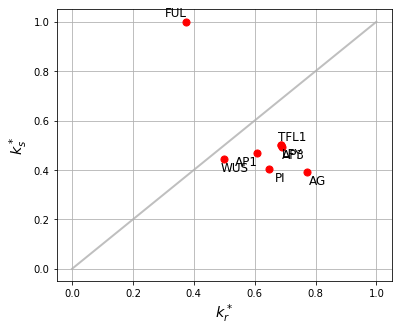

In [10]:
fig, ax = plt.subplots(1,1,figsize=(6,5), sharex=True, sharey=True)
dfp = df.loc[ (df['k']>1) , :]
ax.scatter(dfp['k_r*'],dfp['k_s*'], s=50, c='red', marker='o', zorder=2)
quadrants = [-0.035,0.035]
for name, dfp_ in dfp.iterrows():
    x,y = dfp_['k_r*']+random.choice(quadrants) , dfp_['k_s*']+random.choice(quadrants)
    ax.annotate(name, (x,y),fontsize='large', va='center', ha='center')
ax.plot((0,1),(0,1),'black', lw=2,alpha=0.25, zorder=1)
ax.grid(True)
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)
ax.set_xlabel('$k_r^*$', fontsize='x-large')
ax.set_ylabel('$k_s^*$', fontsize='x-large')
plt.show()

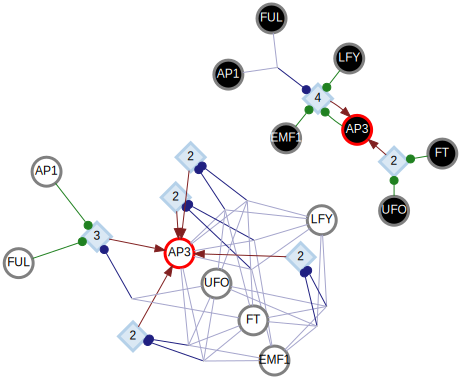

In [11]:
bound = 'upper'
for i,n in enumerate(N.nodes):
    display(HTML('<h2>'+n.name+'</h2>'))
    
    # Build the Canalizing Map with Networkx
    CM = n.canalizing_map()
    # Draws the Canalizing Map using GraphViz
    gv = draw_canalizing_map_graphviz(CM)

    # Display
    display(gv)
    break